In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [2]:
NucliData_df = pd.read_csv('data.csv');

In [3]:
NucliData_df.head()

,id,diagnostics,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
NucliData_df.iloc[:,1] = labelencoder_y.fit_transform(NucliData_df.iloc[:,1].values)

In [5]:
#spilt the data set into independent (X) andd dependent (Y) sata sets
X = NucliData_df.iloc[:,2:31].values
Y= NucliData_df.iloc[:,1].values

In [6]:
#split the data set into 75% training and 25% testing

from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

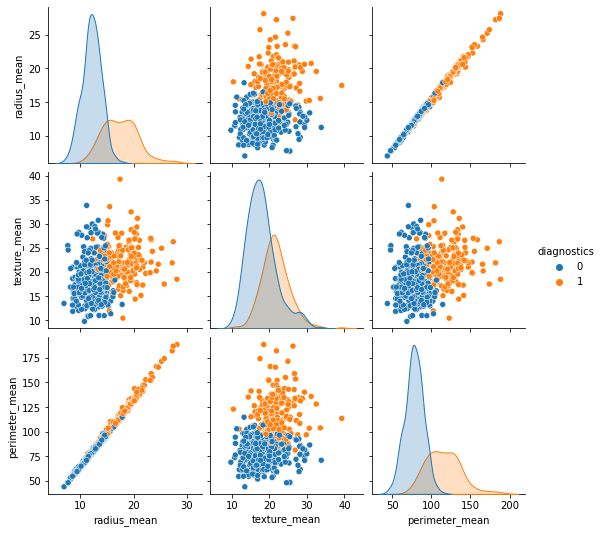

In [7]:
sns.pairplot(NucliData_df.iloc[:,1:5], hue='diagnostics')

In [8]:
#scale the data (feature scaling)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [9]:
#classification through the Adaboost algorithm

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators = 100, random_state=0)
ada.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=0)

In [10]:
n_estimators = [6, 8, 16, 21, 26, 30, 31, 39, 43, 49]

max_features = ['auto', 'sqrt']

max_depths = [6, 9, 11, 13]

min_samples_splits = [1, 2, 3, 4, 5]

min_samples_leafs = [1]

bootstrap = [True, False]

In [11]:
param_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depths,
    'min_samples_split' : min_samples_splits,
    'min_samples_leaf' : min_samples_leafs,
    'bootstrap' : bootstrap
}

In [12]:
predictions = ada.score(X_test, Y_test)
print("Test Accuracy - :", predictions)

Test Accuracy - : 0.8881118881118881


In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators = 100, random_state=0)
ada.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=0)

In [14]:
abc_Model = AdaBoostClassifier()

In [15]:
param_grid = {
    'n_estimators' : [10, 50, 100, 200, 500],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [16]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = abc_Model, param_distributions = param_grid, cv=5, scoring = 'accuracy',  n_jobs=-1)

In [17]:
rf_RandomGrid.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1.0],
                                        'n_estimators': [10, 50, 100, 200,
                                                         500]},
                   scoring='accuracy')

In [18]:
rf_RandomGrid.best_params_

{'n_estimators': 200, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

In [19]:
print(f'Train Accuracy - : {rf_RandomGrid.score(X_train, Y_train):.3f}')
print(f'Test Accuracy - : {rf_RandomGrid.score(X_test, Y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.972


In [20]:
Y_predict_RandomGrid  = rf_RandomGrid.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix

def Matrix(Y_predict):
    cm = confusion_matrix(Y_test, Y_predict)
    
    TP = cm[0][0]
    TN = cm[1][1]
    FP = cm[0][1]
    FN = cm[1][0]

    print(cm)
    print()

    Accuracy = (TP+TN)/(TP+TN+FP+FN)
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)

    F1 = (2*Precision*Recall)/(Precision+Recall)

    print('Accuracy of the Classifier = ', Accuracy)
    print('Precision = ', Precision)
    print('F1 Score = ', F1)

In [22]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']

grid_search = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = grid, n_jobs = -1, cv=10, scoring = 'accuracy')
grid_result = grid_search.fit(X_train, Y_train)

Y_predict_gridSearch  = grid_search.predict(X_test)



# print("Best: %f using train %s" % (grid_result.score(X_train, Y_train), grid_result.best_params_))
# print("Best: %f using train %s" % (grid_result.score(X_test, Y_test), grid_result.best_params_))

In [23]:
Matrix(Y_predict_RandomGrid)
Matrix(Y_predict_gridSearch)

[[88  2]
 [ 2 51]]

Accuracy of the Classifier =  0.972027972027972
Precision =  0.9777777777777777
F1 Score =  0.9777777777777777
[[86  4]
 [ 3 50]]

Accuracy of the Classifier =  0.951048951048951
Precision =  0.9555555555555556
F1 Score =  0.9608938547486034
